In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle as cPickle

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional, LSTM, SimpleRNN, Input, GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Dropout, Activation, MaxPooling1D,Conv1D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.initializers import glorot_uniform
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score,roc_auc_score
import sklearn.metrics as metrics
from keras import models

In [ ]:
path_test = "/content/drive/MyDrive/LBiPlantUbi/Data/"
path_model ="/content/drive/MyDrive/LBiPlantUbi/Model/"

In [ ]:
# Def Dictionary
def Dic_1_gram():#Dictionary for 1_gram
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        AA_dict[i] = numm
        numm += 1
    return AA_dict

In [ ]:
# Separate words in sentences
def ProSentence(pro, K):
	sentence = ""
	length = len(pro)
	for i in range(length - K + 1):
		sentence += pro[i: i + K] + " "
    #delete extra space
	sentence = sentence[0 : len(sentence) - 1]
	return sentence
k =1#1-gram
word_index1 =  Dic_1_gram()
vocab_size = len(word_index1)

In [ ]:
# load test data
filename_test = "testset.csv"
file_test = filename_test
df_test= pd.read_csv(path_test + filename_test,  delimiter= ',')

# preprocessing test data and index number vector
text_test =[] #PTMsequend kmer
for i in df_test['Sequence']:
  temp = ProSentence(i,k) #
  text_test.append(temp)
df_test['k_mer'] =text_test
test_sequences = []
for each in text_test:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences.append(each_index_list)
data_token = []
for i in df_test['k_mer']:
   data_token.append(i.split())
print(data_token[:2])
MAX_SEQUENCE_LENGTH = len(data_token[1])
Xtest = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ytest= df_test['Label']

[['D', 'L', 'S', 'G', 'R', 'E', 'T', 'L', 'V', 'R', 'I', 'T', 'G', 'G', 'M', 'K', 'V', 'K', 'A', 'D', 'R', 'D', 'E', 'S', 'S', 'P', 'Y', 'A', 'A', 'M', 'L'], ['S', 'G', 'R', 'E', 'T', 'L', 'V', 'R', 'I', 'T', 'G', 'G', 'M', 'K', 'V', 'K', 'A', 'D', 'R', 'D', 'E', 'S', 'S', 'P', 'Y', 'A', 'A', 'M', 'L', 'A', 'A']]


In [ ]:
from keras import models
model = models.load_model(path_model +"LBiPlantUbi.h5")
y_pred = model.predict([Xtest,Xtest])

y_pred = (y_pred > 0.5)

y_pred = [int(i) for i in y_pred]

y_pred = np.array(y_pred)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print('Confusion matrix:',cm)

47/47 [==============================] - 1s 9ms/step
ACC, MCC, SN, SP: 0.8353333333333334 0.6746125469767745 0.8893333333333333 0.7813333333333333
Confusion matrix: [[586 164]
 [ 83 667]]


<ipython-input-12-71d32103e7aa>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = [int(i) for i in y_pred]


47/47 [==============================] - 1s 11ms/step
AUC: 0.9022


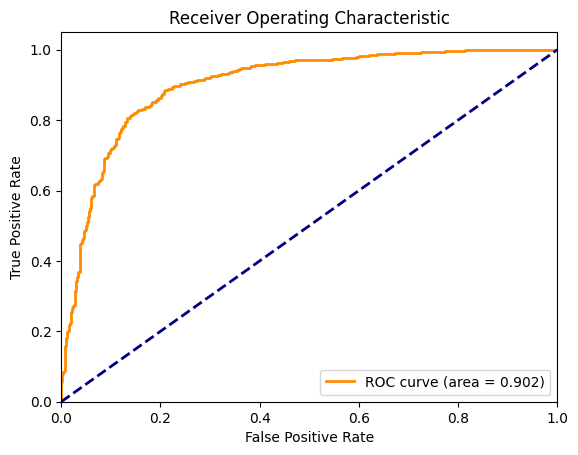

In [ ]:
model = models.load_model(path_model +"LBiPlantUbi.h5")
y_pred_proba = model.predict([Xtest,Xtest])

# Calculate AUC
auc = roc_auc_score(ytest, y_pred_proba)
print(f'AUC: {auc:.4f}')

# Calculate  ROC
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

# Draw ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
